Load library

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

According to the website https://archive.ics.uci.edu/dataset/45/heart +Diseasea import dataset

In [101]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# (1)

Using binary classification to predict whether one has heart disease problems

Display variable names

In [102]:
df = pd.concat([X, y], axis=1)
print(X.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# (2)

Get all column names

In [103]:
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols += ['cp', 'restecg', 'slope', 'thal', 'ca', 'sex', 'fbs', 'exang']
categorical_cols = list(set(categorical_cols)) 
numerical_cols = [col for col in X.columns if col not in categorical_cols]

Establish a converter

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Application Converter

In [105]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
print(f"before:{X_train.shape},after:{X_train_transformed.shape}")

before:(242, 13),after:(242, 30)


# (3)

Numerical variable statistics

In [106]:
print("Shape of X:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

# datatype
print(X.dtypes)

# sum
print(X.describe())

Shape of X: (303, 13)
Target distribution:
 num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
dtype: float64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.00000

(1) This dataset contains a total of 303 observation records and 13 feature variables. The target variable is' target ', which represents whether or not one has heart disease. 54.1% have no disease, while 45.9% have disease. This distribution is relatively balanced and suitable for training and evaluating binary classification models.

(2) All variables are numeric, with oldpeak, ca, and that being floating-point and the rest being integer.

(3) From the descriptive statistical results, the average age of the sample is 54.4 years old, mainly consisting of middle-aged and elderly people; The average value of cho is 246.7, with a maximum value of 564, indicating possible outliers; The average trendbps is 131.7 with a standard deviation of 17.6, indicating significant differences between individuals. Some variables such as cp and sex are categorical variables and are encoded with numbers.

# (4)

Obtain the target column name

In [107]:
target_col = y.columns[0]

Convert y to binary classification

In [108]:
y[target_col] = y[target_col].apply(lambda x: 1 if x > 0 else 0)
y.columns = ['target']

C:\Users\28370\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Merge again

In [109]:
df = pd.concat([X, y], axis=1)

# (5)

Correlation heatmap between numerical variables

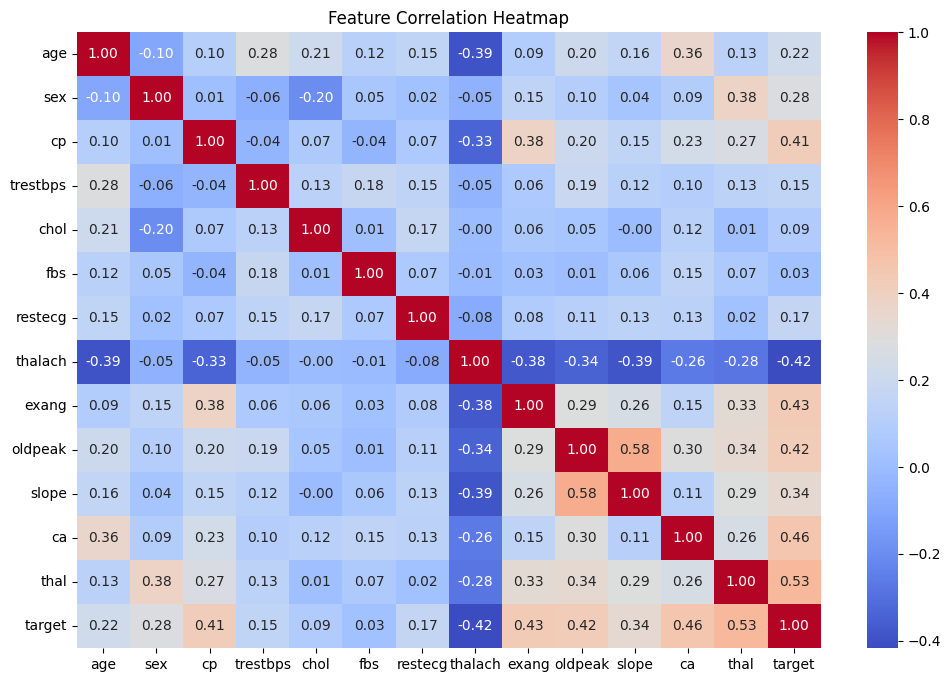

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Display the top few variables most relevant to the target variable

In [111]:
corr_with_target = df_corr.corr()['target'].drop('target').sort_values(ascending=False)
print(corr_with_target)

thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


Draw variable 'age' The relationship diagram between 'chol', 'thalach', 'oldpeak' and target

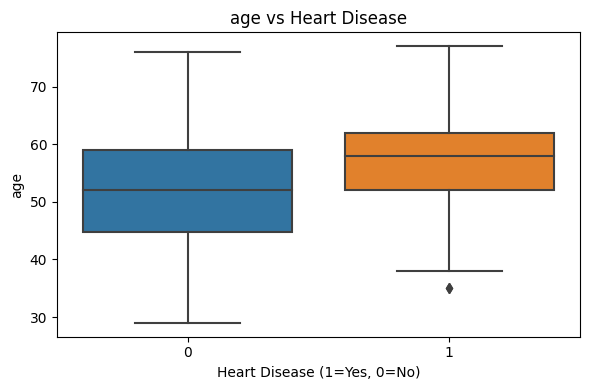

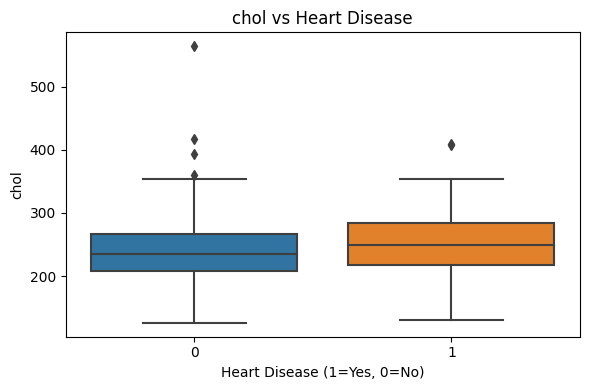

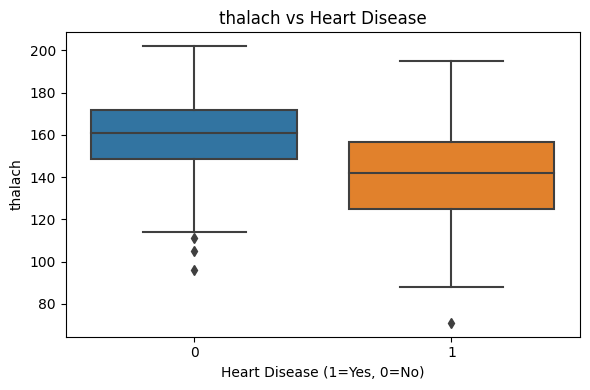

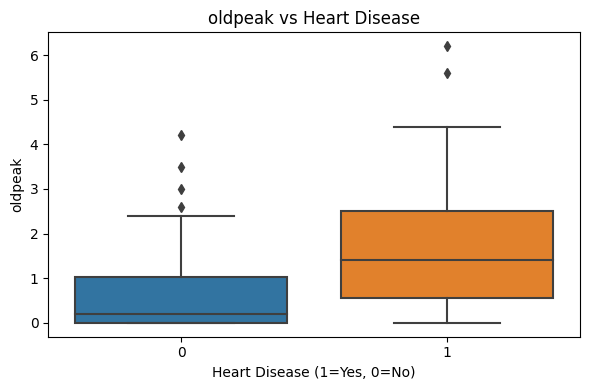

In [112]:
features_to_plot = ['age', 'chol', 'thalach', 'oldpeak']

for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df_corr)
    plt.title(f"{col} vs Heart Disease")
    plt.xlabel("Heart Disease (1=Yes, 0=No)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

(1) The correlation between features such as that, ca, and oldpeak and heart disease is the strongest. From the correlation heatmap, it can be seen that the correlation coefficients between that, ca, and oldpeak target variables are 0.53, 0.46, and 0.42, respectively, all significantly higher than other features. These features have strong discriminative ability.

(2) Thalach is negatively correlated with the target variable. The correlation coefficient between Thalach and heart disease is approximately -0.42, and the boxplot shows a trend of lower upper heart rate limits in patients. Although it is negatively correlated, it also has important classification ability.

# (6)

In [113]:
original_rows = df.shape[0]
df_cleaned = df.dropna()
remaining_rows = df_cleaned.shape[0]
print(f"before：{original_rows}\nafter：{remaining_rows}")

before：303
after：297


There are 297 osbervations after dropping the missing values.

# (7)

Copy data and delete category variables and target labels

In [114]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_data = df.drop(columns=categorical_cols)

Standardized numerical characteristics

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_data)

Using KMeans clustering

In [116]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

PCA dimensionality reduction and visualization

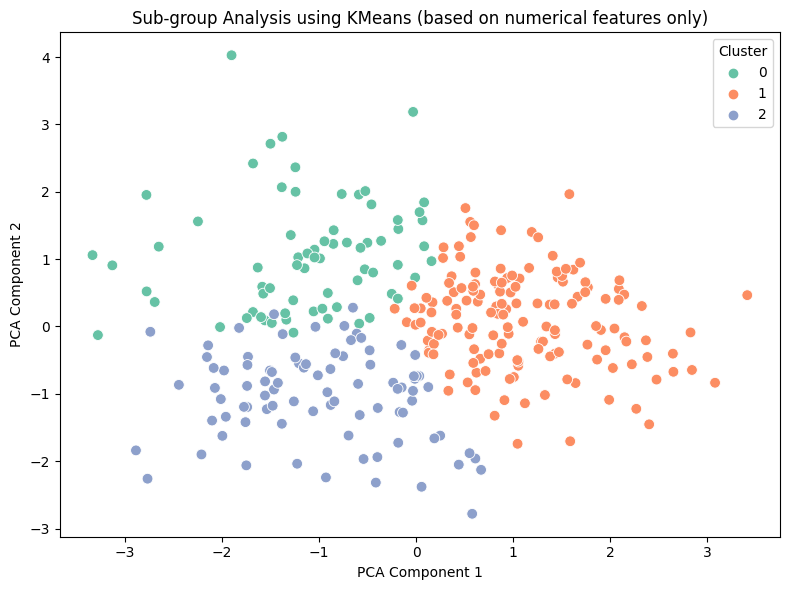

In [117]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title("Sub-group Analysis using KMeans (based on numerical features only)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# (8)

Separate features from targets

In [118]:
X = df.drop(columns=['target'])
y = df['target']

Split dataset

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# (9)

Classifier: KNN and Decision Tree


(1) KNN is based on the principle of "similar patients have similar results" and classifies by comparing the distance between feature values. The heart disease dataset contains multiple continuous numerical features (such as age), and KNN can effectively capture the proximity relationships between these variables to determine whether a new patient may have the disease.


(2) Decision Tree can automatically identify the variables that have the most impact on the results and present classification paths in a tree like structure. Faced with multiple categorical variables (such as CP), decision trees can be directly modeled without feature transformation, and the classification rules are intuitive and clear, making them very suitable for explaining which feature combinations are more likely to cause heart disease.

# (10)

Take ROC AUC score and accuracy as model evaluation metrics.

(1) ROC AUC can comprehensively measure the robustness and discriminative power of a model under different discriminative thresholds, and is a widely used evaluation method in medical diagnostic tasks.

(2) Accuracy reflects the overall prediction accuracy of the model at the current threshold, and the combination of the two can more comprehensively evaluate the performance of the model.

# (11)

Set feature column

In [120]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

Build Preprocessor

In [121]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

KNN pipeline and grid search

In [122]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                           

Decision Tree pipeline and grid search

In [123]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=1))
])

tree_params = {
    'tree__max_depth': [3, 5, 7, 9, None],
    'tree__min_samples_split': [2, 5, 10]
}

tree_grid = GridSearchCV(tree_pipeline, tree_params, cv=5, scoring='roc_auc')
tree_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                           

Output optimal parameters

In [124]:
print("KNN:", knn_grid.best_params_)
print("Decision Tree:", tree_grid.best_params_)

KNN: {'knn__n_neighbors': 9}
Decision Tree: {'tree__max_depth': 3, 'tree__min_samples_split': 10}


KNN optimal parameters:neighbors:9
Decision Tree optimal parameters:  tree__max_depth: 3, tree__min_samples_split: 10

# (12)

Build a pipeline containing PCA

In [125]:
pca_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()), 
    ('knn', KNeighborsClassifier())
])

Set grid search parameters

In [126]:
pca_knn_params = {
    'pca__n_components': [5, 8, 10, 12], 
    'knn__n_neighbors': [3, 5, 7, 9]  
}

Grid search

In [127]:
pca_knn_grid = GridSearchCV(pca_knn_pipeline, pca_knn_params, cv=5, scoring='roc_auc')
pca_knn_grid.fit(X_train, y_train)
print("Optimal parameters:", pca_knn_grid.best_params_)

Optimal parameters: {'knn__n_neighbors': 7, 'pca__n_components': 10}


# (13)

KNN:

In [128]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

Decision Tree:

In [129]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=1))
])
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)
y_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]

PCA and KNN:

In [130]:
pca_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pca_knn_pipeline.fit(X_train, y_train)
y_pred_pca_knn = pca_knn_pipeline.predict(X_test)
y_proba_pca_knn = pca_knn_pipeline.predict_proba(X_test)[:, 1]

Display results

In [131]:
results = pd.DataFrame({
    'Classifier': ['KNN', 'Decision Tree', 'PCA + KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_pca_knn)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, y_proba_tree),
        roc_auc_score(y_test, y_proba_pca_knn)
    ]
})
print(results)

      Classifier  Accuracy   ROC AUC
0            KNN  0.835165  0.881681
1  Decision Tree  0.747253  0.722789
2      PCA + KNN  0.824176  0.840865


(1) The KNN classifier performs the best in heart disease prediction (accuracy 83.5%, ROC AUC 88.2%), indicating that the patient's health status is closely related to the "similarity" of others in the feature space.

(2） The performance of decision tree models is relatively weak (accuracy 74.7%, ROC AUC 72.3%), which may be due to the complex discriminative logic of heart disease, involving nonlinear interactions of multiple variables, and the difficulty of effectively expressing this relationship with a single decision tree.

The PCA+KNN model after feature extraction using PCA reduces the feature dimension to some extent, but its performance is slightly lower than the original KNN (accuracy 82.4%, ROC AUC 84.1%). This indicates that in this dataset, although dimensionality reduction helps simplify the model, it may also discard some important features with medical significance, resulting in information loss. Therefore, in medical data modeling, whether to perform feature extraction should be balanced between the interpretability of the original variables and their clinical value.

# (14)

Extracting decision tree objects from pipelines

In [132]:
tree_model = tree_pipeline.named_steps['tree']

Obtain feature names

In [133]:
ohe = tree_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(cat_feature_names) + numerical_cols

importances = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

Output the top ten most important variables

In [134]:
print(importance_df.head(10)) 

      Feature  Importance
10  restecg_2    0.360576
26   trestbps    0.162345
4        cp_3    0.121450
21   thal_3.0    0.089857
0       sex_0    0.070115
5        cp_4    0.051451
3        cp_2    0.045992
2        cp_1    0.029777
17     ca_1.0    0.029304
1       sex_1    0.027422


（1） Restecg2 is the most important predictor variable in decision tree models, accounting for approximately 36%. This indicates that specific types of electrocardiogram abnormalities have a significant impact on determining the presence of heart disease.

（2） As a continuous variable, trendbps ranks second in feature importance in the model (about 16.2%), indicating a significant correlation between hypertension or abnormal elevation of blood pressure at rest and heart disease.